<a href="https://colab.research.google.com/github/komal-SkyNET/ai-neural-networks/blob/master/google-colab/image_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [0]:
mnist_ds = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist_ds.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore Data

In [0]:
train_images.shape

(60000, 28, 28)

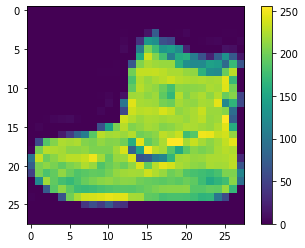

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

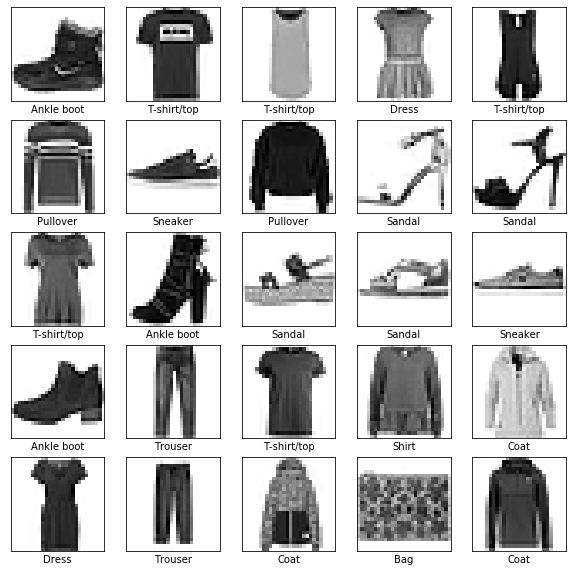

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4950 - acc: 0.8267
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3746 - acc: 0.8659
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3356 - acc: 0.8785
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3134 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2955 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2812 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2697 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2564 - acc: 0.9050
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2490 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.3384 - acc: 0.8839


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

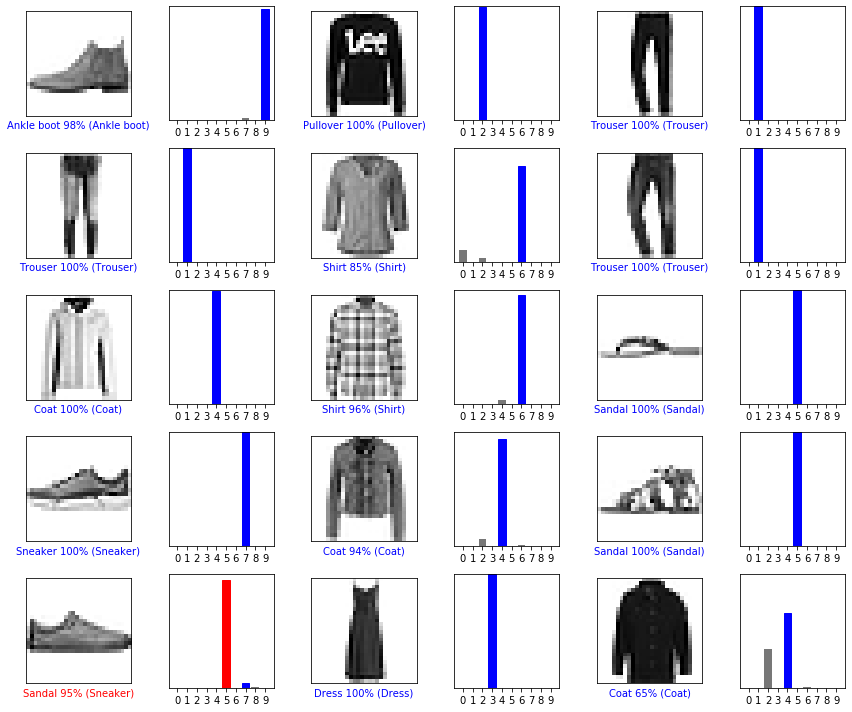

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()